# **Task 1 -The Business Problem Exploring** 

### Problem Statement - 
 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

In [184]:
#Importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#For data analysis
import pandas as pd
import numpy as np
import random as rndm
import matplotlib.pyplot as plt#For Graphs
import seaborn as sns
%matplotlib inline


In [185]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [186]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [187]:
train = pd.read_csv("/content/drive/MyDrive/Big Mart/Train.csv")
test = pd.read_csv("/content/drive/MyDrive/Big Mart/Test.csv")

In [188]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
train.shape

(8523, 12)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
test.shape

(5681, 11)

In [ ]:
#Combine test and train into one file so that it be easy to analyze
train['source']='train'
test['source']='test'
test['Item_Outlet_Sales']=0.0
data = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 13) (14204, 13)


In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [ ]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [ ]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [ ]:
def check_missing_values(df) :
    # Getting columns with missing values in a list
    missing_cols = df.columns[df.isnull().any() == True].tolist()
    # Calculating % of missing values in each column
    col_perscentage = df.isnull().sum()/ df.shape[0]*100
    
    print("-"*50)
    if missing_cols == []:
        print("The DataFrame has No Missing Values!")
    else:
        for i, col in enumerate(missing_cols):
            print('"{}" column has {:.2f}% of missing values.'.format(col, col_perscentage[missing_cols[i]]))
    print("-"*50)

In [ ]:
check_missing_values(train)
check_missing_values(test)

--------------------------------------------------
"Item_Weight" column has 17.17% of missing values.
"Outlet_Size" column has 28.28% of missing values.
--------------------------------------------------
--------------------------------------------------
"Item_Weight" column has 17.18% of missing values.
"Outlet_Size" column has 28.27% of missing values.
--------------------------------------------------


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

In [ ]:
# Training categorical and numerical columns
categorical_columns_train = train.select_dtypes(include=[object])
print("Training categorical Features in Train Set:", len(categorical_columns_train.columns))
numerical_columns_train = train.select_dtypes(include=[np.float64, np.int64])
print("Training numerical Features in Train Set:", len(categorical_columns_train.columns))

# testing categorical and numerical columns
categorical_columns_test = test.select_dtypes(include=[object])
print("\nTesting categorical Features in Test Set:", len(categorical_columns_test.columns))
numerical_columns_test = test.select_dtypes(include=[np.float64, np.int64])
print("Testing numerical Features in Test Set:", len(numerical_columns_test.columns))

Training categorical Features in Train Set: 8
Training numerical Features in Train Set: 8

Testing categorical Features in Test Set: 8
Testing numerical Features in Test Set: 5


In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,4705.000000,5681.000000,5681.000000,5681.000000,5681.0
mean,12.695633,0.065684,141.023273,1997.828903,0.0
std,4.664849,0.051252,61.809091,8.372256,0.0
min,4.555000,0.000000,31.990000,1985.000000,0.0
25%,8.645000,0.027047,94.412000,1987.000000,0.0
50%,12.500000,0.054154,141.415400,1999.000000,0.0
75%,16.700000,0.093463,186.026600,2004.000000,0.0
max,21.350000,0.323637,266.588400,2009.000000,0.0


Item Weight


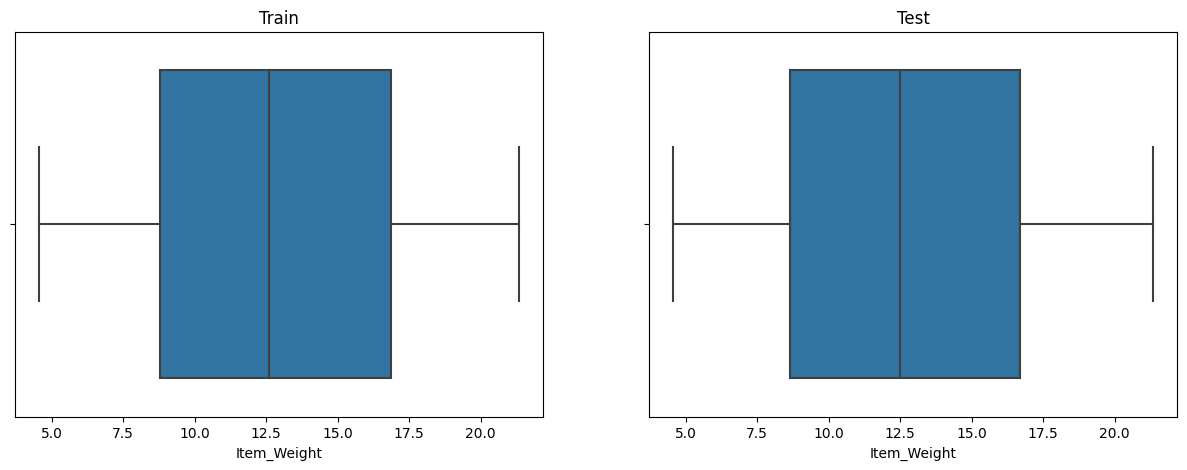

In [ ]:
# ploting the weight to see the distribution of the data
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.boxplot(x="Item_Weight", data=train, ax=axes[0])
axes[0].set_title("Train")

sns.boxplot(x="Item_Weight", data=test, ax=axes[1])
axes[1].set_title("Test");

In [ ]:
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [ ]:
print('"{}" column in training set has {:.2f}% of missing values.'.format('Outlet_Size',
                                                          train["Outlet_Size"].isnull().sum() / train.shape[0] * 100))

print('"{}" column in test set has {:.2f}% of missing values.'.format('Outlet_Size',
                                                          test["Outlet_Size"].isnull().sum() / test.shape[0] * 100))

"Outlet_Size" column in training set has 28.28% of missing values.
"Outlet_Size" column in test set has 28.27% of missing values.


In [ ]:
train["Outlet_Size"].isnull().sum(), test["Outlet_Size"].isnull().sum()

(2410, 1606)

In [ ]:
# Checking nature of the data in the column
train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
test["Outlet_Size"].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

#### Displaying the percentage of categorical values in "Outlet_size"

In [ ]:
# For train set
print("Percentage of 'Outlet_Size' column values in training dataset\n")
print(train["Outlet_Size"].value_counts() / train.shape[0] * 100)
print("-"*60)
print("Percentage of 'Outlet_Size' column values in test dataset\n")
print(test["Outlet_Size"].value_counts() / test.shape[0] * 100)

Percentage of 'Outlet_Size' column values in training dataset

Medium    32.770151
Small     28.018303
High      10.935117
Name: Outlet_Size, dtype: float64
------------------------------------------------------------
Percentage of 'Outlet_Size' column values in test dataset

Medium    32.775920
Small     28.023235
High      10.931174
Name: Outlet_Size, dtype: float64


##### Since the outlet_size is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column.

In [ ]:
train["Outlet_Size"] = train["Outlet_Size"].fillna(train["Outlet_Size"].mode()[0])
test["Outlet_Size"] = test["Outlet_Size"].fillna(test["Outlet_Size"].mode()[0])

In [ ]:
check_missing_values(train)

--------------------------------------------------
The DataFrame has No Missing Values!
--------------------------------------------------


In [ ]:
check_missing_values(test)

--------------------------------------------------
The DataFrame has No Missing Values!
--------------------------------------------------


##### I have noticed that the item_fat_content has two categorical values but the are encoded unproparly

In [ ]:
# Checking categorical values in the column
train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Fixing the column in train and test dataset
train["Item_Fat_Content"].replace({"LF":"Low Fat", "low fat": "Low Fat", "reg": "Regular"}, inplace=True)
test["Item_Fat_Content"].replace({"LF":"Low Fat", "low fat": "Low Fat", "reg": "Regular"}, inplace=True)

In [ ]:
# Sanity check
print(train["Item_Fat_Content"].value_counts())
print("-"*50)
print(test["Item_Fat_Content"].value_counts())
# Changing the column type to string 
train["Item_Fat_Content"] = train["Item_Fat_Content"].apply(str)
test["Item_Fat_Content"] = test["Item_Fat_Content"].astype(str)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
--------------------------------------------------
Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64


In [ ]:
# Sanity check
train["Item_Fat_Content"].dtypes, train["Item_Fat_Content"].dtypes

(dtype('O'), dtype('O'))

#### Displaying the percentage of categorical values in "Item_Fat_Content"

In [ ]:
# For train set
print("Percentage of 'Item_Fat_Content' column values in training dataset\n")
print(train["Item_Fat_Content"].value_counts() / train.shape[0] * 100)
print("-"*60)
print("Percentage of 'Item_Fat_Content' column values in test dataset\n")
print(test["Item_Fat_Content"].value_counts() / test.shape[0] * 100)

Percentage of 'Item_Fat_Content' column values in training dataset

Low Fat    64.730729
Regular    35.269271
Name: Item_Fat_Content, dtype: float64
------------------------------------------------------------
Percentage of 'Item_Fat_Content' column values in test dataset

Low Fat    64.566098
Regular    35.433902
Name: Item_Fat_Content, dtype: float64


## EDA

### 1) Univariate Analysis

In [ ]:
def plot_univariate(col,width,height):
    """
    INPUT:
        col: Column name to be ploted 
        width: Figure width
        height: Figure hight 
        
    RETURN: 
        A plot of counted categorical items in the column
    """
    plt.figure(figsize=(width,height))
    sns.countplot(x=col,data=train,palette='Blues_r',
                  order=train[col].value_counts().index)

    plt.title("Distribution of "+col+" in the supermarkets",fontsize=18)
    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(col,fontsize=16)
    plt.ylabel("Count",fontsize=16)

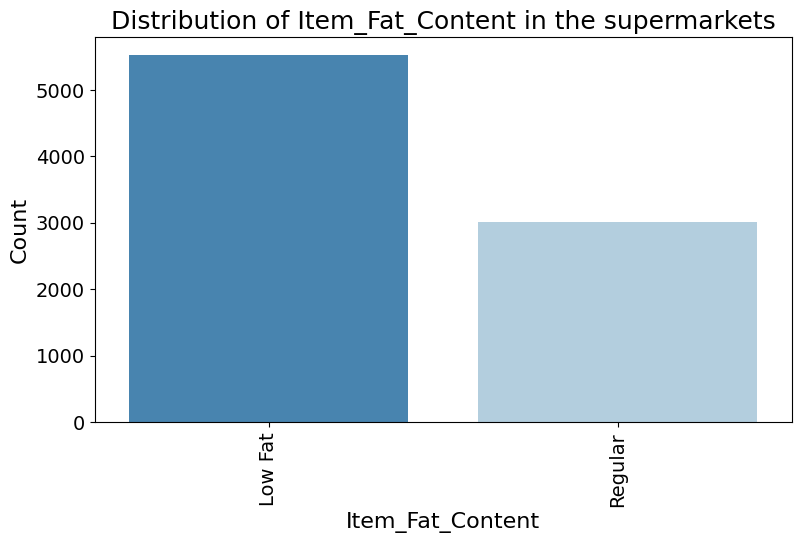

In [ ]:
plot_univariate(col="Item_Fat_Content",width=9,height=5)

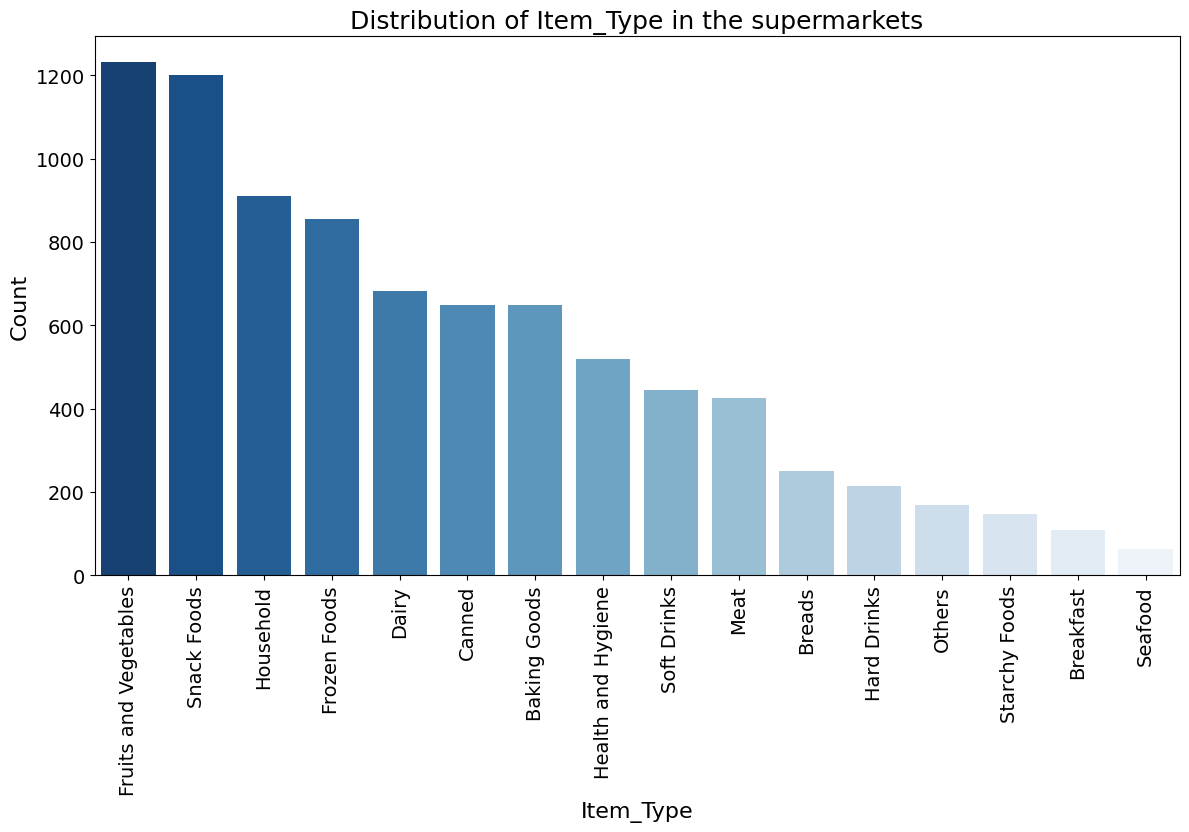

In [ ]:
plot_univariate("Item_Type",14,7)

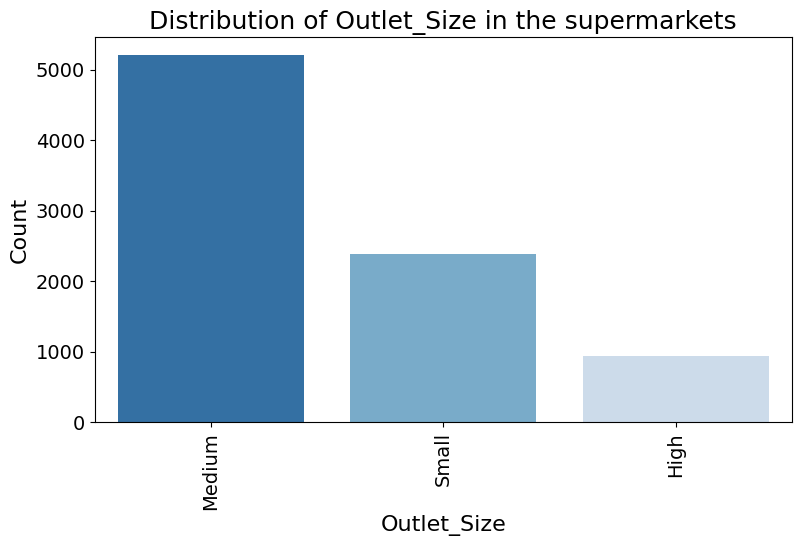

In [ ]:
#Outlet size
plot_univariate("Outlet_Size",9,5)

### **Here we came to conclusion that that medium stores more than small and high**

### **Bivariate Analysis**

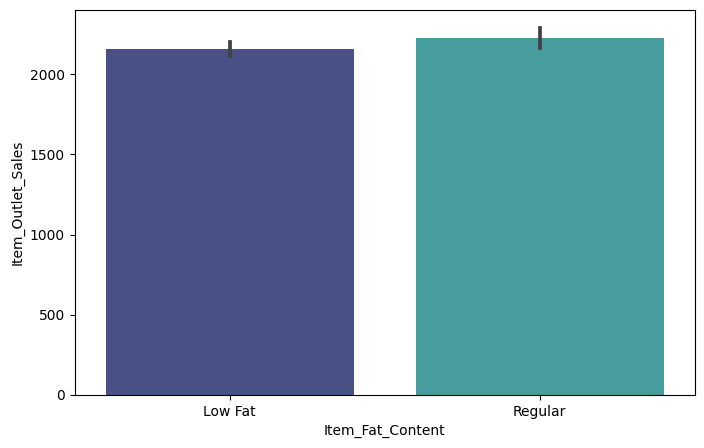

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=train,palette='mako');

In [ ]:
train.groupby("Item_Fat_Content")["Item_Outlet_Sales"].sum()

Item_Fat_Content
Low Fat    1.190409e+07
Regular    6.687031e+06
Name: Item_Outlet_Sales, dtype: float64

**The item visibility column has alot of values with zero in it this cannot be right, as the item is impossible to be unvisibile 
Lets chack that**

In [ ]:
# Checking if the column has a zero value
print(train["Item_Visibility"].min())
print("#"*50)
# Double checking
print("\n",train["Item_Visibility"].value_counts())

0.0
##################################################

 0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64


In [ ]:
# Imputing the column with the mean in both train and test datasets
train["Item_Visibility"] = train["Item_Visibility"].replace({0.000000: train["Item_Visibility"].mean()})
test["Item_Visibility"] = test["Item_Visibility"].replace({0.000000: test["Item_Visibility"].mean()})

In [ ]:
# Sanity check
train["Item_Visibility"].min(), test["Item_Visibility"].min()

(0.003574698, 0.003591414)

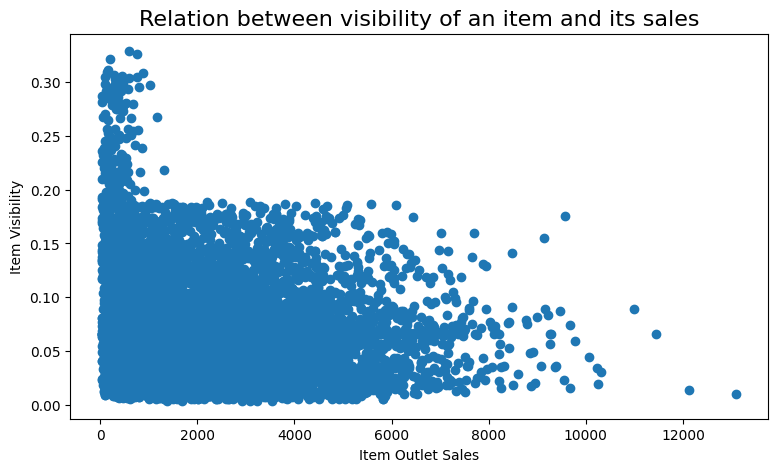

In [ ]:
# Ploting the distribution of the column
plt.figure(figsize=(9,5))
plt.scatter(x='Item_Outlet_Sales',y='Item_Visibility',data=train)
plt.title("Relation between visibility of an item and its sales", fontsize=16)
plt.xlabel('Item Outlet Sales')
plt.ylabel('Item Visibility');

**We can see that now visibility is not exactly zero and it has some value indicating that Item is rarely purchased by the customers.**


#### Item_MRP Visualization
Item_MRP column has maximum Retail Price (list price) of the product


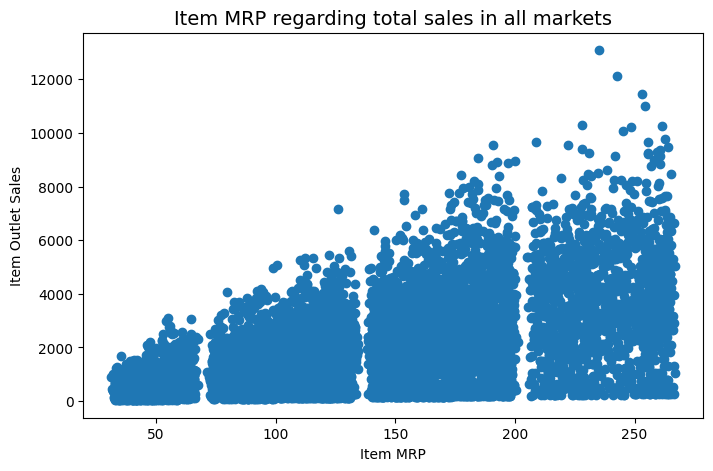

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=train)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.title("Item MRP regarding total sales in all markets", fontsize=14);

As you can see the item MRP is kinda divided to four categories, the last two categories indicates that they tend to have higher sales.

Next step i will divide this column to four categories and the thir affect Item sales, and its better to be visiualized with barplot

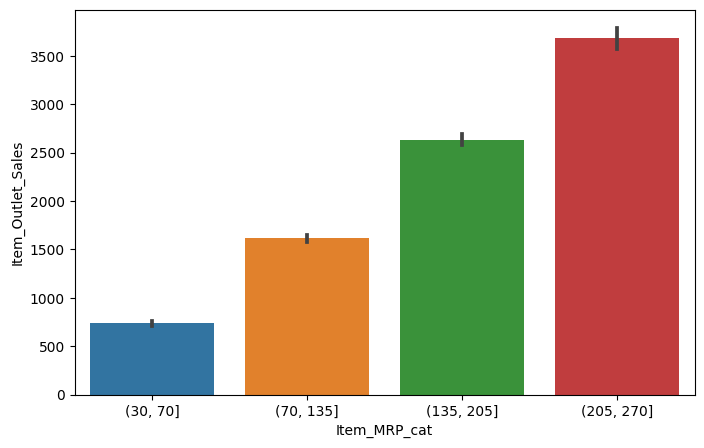

In [ ]:
# Slicing the Item_MRP column into four categories 
train["Item_MRP_cat"] = pd.cut(train["Item_MRP"], [30,70,135,205,270])

# making sure i slice the data correct into those four categories
plt.figure(figsize=(8,5))
sns.barplot(y='Item_Outlet_Sales',x="Item_MRP_cat" ,data=train);

**Now i will preform numerical analysis on those categories**

In [191]:
# seeing the numerical charactaristics for these categories
train.groupby("Item_MRP")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Item_MRP,,,,,,,,
31.2900,1.0,898.8300,NaN,898.8300,898.8300,898.8300,898.8300,898.8300
31.4900,1.0,466.0600,NaN,466.0600,466.0600,466.0600,466.0600,466.0600
31.8900,1.0,366.1900,NaN,366.1900,366.1900,366.1900,366.1900,366.1900
31.9558,2.0,679.1160,432.186776,373.5138,526.3149,679.1160,831.9171,984.7182
32.0558,1.0,1018.6740,NaN,1018.6740,1018.6740,1018.6740,1018.6740,1018.6740
...,...,...,...,...,...,...,...,...
266.1884,2.0,4239.8144,1499.000757,3179.8608,3709.8376,4239.8144,4769.7912,5299.7680
266.2884,1.0,2914.8724,NaN,2914.8724,2914.8724,2914.8724,2914.8724,2914.8724
266.5884,2.0,3974.8260,3747.501892,1324.9420,2649.8840,3974.8260,5299.7680,6624.7100


In [222]:
p =train.groupby("Item_MRP")["Item_Outlet_Sales"].count().sort_values(ascending=False)


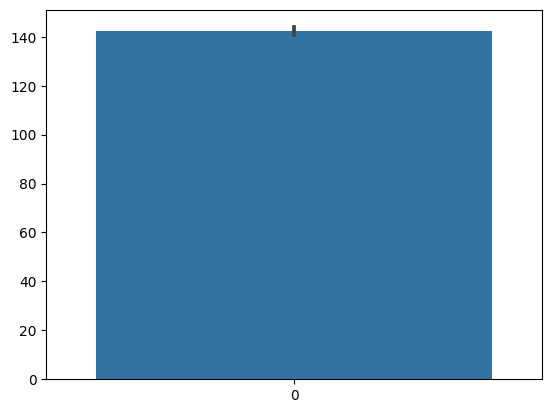

In [225]:
sns.barplot(p.index);

From the table above we can conclude that 
  - You can see that the number of sales made by the second categore which its Maximum Retail Price(MRP) between **((70, 135])** and **((135,205])** are nearly double the number of sales made by any other category, This means we should increase the most purchased product with this range  of Maximum Retail Price(MRP) in all supermarkets.
  
  - Also the mean of the products with MRP more than 200 is high , this is because it has higher price but not because it is purchased a lot.

In [ ]:
# Numerical charactaristics of years related to sales
train.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Establishment_Year,,,,,,,,
1985,1463.0,2483.677474,2347.516621,33.9558,399.48000,1845.5976,3968.16800,13086.9648
1987,932.0,2298.995256,1533.531664,73.2380,1072.60380,2050.6640,3166.37835,10256.6490
1997,930.0,2277.844267,1488.405631,101.8674,1137.18640,1945.8005,3095.63710,9779.9362
1998,555.0,339.351662,271.014855,33.2900,154.13270,250.3408,455.40720,1775.6886
1999,930.0,2348.354635,1513.289464,111.8544,1182.79370,1966.1074,3281.72820,7646.0472
2002,929.0,2192.384798,1462.399658,99.8700,1068.60900,1834.9448,2929.52000,8994.9580
2004,930.0,2438.841866,1538.512533,113.8518,1238.88735,2109.2544,3310.35760,8479.6288
2007,926.0,2340.675263,1550.778025,143.8128,1195.94325,2005.0567,3096.46935,9664.7528
2009,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228


In [ ]:
# Grouping Outlet_identifier with the years it was established in.
train.Outlet_Establishment_Year.groupby(train.Outlet_Identifier).apply(np.array).apply(lambda x: np.unique(x))

Outlet_Identifier
OUT010    [1998]
OUT013    [1987]
OUT017    [2007]
OUT018    [2009]
OUT019    [1985]
OUT027    [1985]
OUT035    [2004]
OUT045    [2002]
OUT046    [1997]
OUT049    [1999]
Name: Outlet_Establishment_Year, dtype: object

The year "1985" was a year that Bigmart established **TWO** Outlets ("OUT019" and "OUT027"), so when we grouped the sales with years, the first year was the sales of two outlets ("OUT019" and "OUT027") together.

In [ ]:
train.groupby("Outlet_Identifier")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Identifier,,,,,,,,
OUT010,555.0,339.351662,271.014855,33.2900,154.13270,250.3408,455.40720,1775.6886
OUT013,932.0,2298.995256,1533.531664,73.2380,1072.60380,2050.6640,3166.37835,10256.6490
OUT017,926.0,2340.675263,1550.778025,143.8128,1195.94325,2005.0567,3096.46935,9664.7528
OUT018,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
OUT019,528.0,340.329723,249.979449,33.9558,153.63335,265.3213,460.73360,1482.0708
OUT027,935.0,3694.038558,2127.760054,241.6854,2044.33890,3364.9532,4975.52340,13086.9648
OUT035,930.0,2438.841866,1538.512533,113.8518,1238.88735,2109.2544,3310.35760,8479.6288
OUT045,929.0,2192.384798,1462.399658,99.8700,1068.60900,1834.9448,2929.52000,8994.9580
OUT046,930.0,2277.844267,1488.405631,101.8674,1137.18640,1945.8005,3095.63710,9779.9362


These two outlets have **lower num of sales** made, and **lower price of item** relative to the other outlets, so it justifies lower number of overall Outlet sales.


## **Item type affecting the sales**

In [200]:
# Order item types and their total sales
order_type = train.groupby("Item_Type")["Item_Outlet_Sales"].sum().sort_values(ascending=False)

In [211]:
le = LabelEncoder()

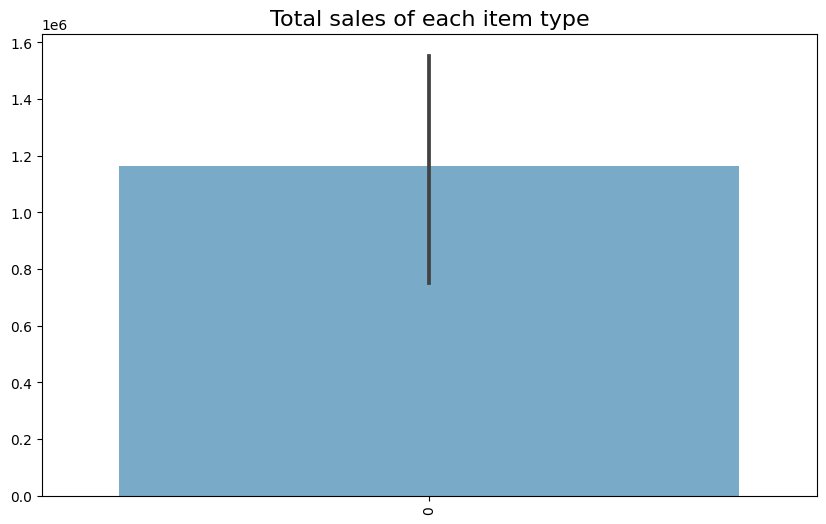

In [210]:
plt.figure(figsize=(10,6))
sns.barplot(order_type,palette='Blues_r')
plt.xticks(rotation=90)
plt.title("Total sales of each item type", fontsize=16);

### **Feature Engineering**

**We will build a preprocessing pipeline, inside i am goging to scale the numerical data and encode the categorical ones then adding the classifier **

In [ ]:
# Importing the important libiries

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)

In [ ]:
# Buliding the first part of the pipeline
# Scaling the numeric features 
num_features = ["Item_Weight","Item_Visibility","Item_MRP"]
numeric_transformer= Pipeline(
    steps=[("scaler", StandardScaler())]
)

# Encoding the important categorical features
categorical_features = train.select_dtypes(include=['object']).columns.tolist()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

##**Label Encoding**

In [ ]:
le = LabelEncoder()

In [ ]:
train  = train.apply(le.fit_transform)

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_MRP_cat
0,156,284,0,663,4,5592,9,4,1,0,1,2540,0,3
1,8,57,1,879,14,473,3,8,1,2,2,422,0,0
2,662,376,0,714,10,2901,9,4,1,0,1,1639,0,2
3,1121,393,1,4432,6,4227,0,3,1,2,0,670,0,2
4,1297,265,0,4432,9,627,1,1,0,2,1,865,0,0


In [ ]:
X = train.drop('Item_Outlet_Sales',axis = 1)
y = train['Item_Outlet_Sales']

### **One Hot Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')

In [ ]:
y = OneHotEncoder().fit_transform(train).toarray()

In [ ]:
print(train)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156          284                 0              663   
1                   8           57                 1              879   
2                 662          376                 0              714   
3                1121          393                 1             4432   
4                1297          265                 0             4432   
...               ...          ...               ...              ...   
8518              370          125                 0             3911   
8519              897          233                 1             3277   
8520             1357          299                 0             2301   
8521              681          149                 1             7175   
8522               50          347                 0             3107   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4      5592                  9    

# **Modelling**

## Linear regression and Preprocessing The data
**Appending Linear regression classifier to preprocessing pipeline. Now we have a full prediction pipeline.** 

In [ ]:
# Linearclassfier pipeline model
LR_clf = Pipeline(
    steps= [("preprocessor", preprocessor),
    ("classifier", LinearRegression())]
)

In [ ]:
# Splitting the train data to dataset and a target value 
y= train['Item_Outlet_Sales']
X= train.drop("Item_Outlet_Sales", axis=1)

In [ ]:
# Splitting the data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting the model
LR_clf.fit(X_train, y_train)
print("model score: %.3f" % LR_clf.score(X_test, y_test))

model score: 0.512


### **Regularized Linear Regression**

In [228]:
# Importing ridge regression
from sklearn.linear_model import Ridge

# Buliding the pipeline for ridge regression
Ridge_clf = Pipeline(
    steps= [("preprocessor", preprocessor),
    ("classifier_Ridge", Ridge())]
)

# Fitting the model
Ridge_clf.fit(X_train, y_train)
print("model score: %.3f" % Ridge_clf.score(X_test, y_test))

model score: 0.566


In [229]:
# Find optimal alpha with grid search 
param_grid = {
    "classifier_Ridge__alpha":[0.001,0.01,0.1,1,10,100,150,1000]
}

# Insintiating grid search model
Ridge_grid = GridSearchCV(estimator=Ridge_clf, param_grid=param_grid,
                          scoring="r2",cv=5)

# Getting the best results in the grid search
Ridge_grid_result= Ridge_grid.fit(X_train, y_train)

print('Best Score: ', Ridge_grid_result.best_score_)
print('Best Params: ', Ridge_grid_result.best_params_)

Best Score:  0.63276097427498
Best Params:  {'classifier_Ridge__alpha': 100}


##**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [ ]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,r2_score

In [ ]:
print(r2_score(y_test,y_pred))

0.6083939555874696


###**XGBoost regressor**
**

Appending XGBoost regressor to preprocessing pipeline. so we can have a full prediction pipeline for it.**

In [ ]:
# Importing XGBoost regressor 
from xgboost.sklearn import XGBRegressor

In [ ]:
# XGBoost regressor pipeline model
XGB_reg = Pipeline(
    steps= [("preprocessor", preprocessor),
    ("XGB_regressor", XGBRegressor())]
)

# Fitting the moedel to the data
XGB_reg.fit(X_train, y_train)
print("XGB model accuracy: %.3f" % XGB_reg.score(X_test, y_test))

XGB model accuracy: 0.630


In [ ]:
# Finding best paramets for XGB model 
param_grid = {
    "XGB_regressor__nthread": [4], # When use hyberthread, XGBoost may be slower
    "XGB_regressor__objective": ['reg:linear'],
    "XGB_regressor__learning_rate": [0.03,0.05,0.07],
    "XGB_regressor__max_depth": [5,6,7,15],
    "XGB_regressor__min_child_weight": [4,5,10],
    "XGB_regressor__silent": [1],
    "XGB_regressor__subsample": [0.07],
    "XGB_regressor__colsample_bytree": [0.07],
    "XGB_regressor__n_estimators":[100, 500,1000]
}
# Insintiating grid search model
XGB_grid = GridSearchCV(estimator=XGB_reg, param_grid=param_grid,
                          scoring="r2",cv=5,n_jobs=5,verbose=True)

# Getting the best results in the grid search
XGB_grid_result= XGB_grid.fit(X_train, y_train)

print('Best Score: ', XGB_grid_result.best_score_)
print('Best Params: ', XGB_grid_result.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[14:38:08] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:38:08] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

Best Score:  0.6412101412895075
Best Params:  {'XGB_regressor__colsample_bytree': 0.07, 'XGB_regressor__learning_rate': 0.05, 'XGB_regressor__max_depth': 5, 'XGB_regressor__min_child_weight': 10, 'XGB_regressor__n_estimators': 1000, 'XGB_regressor__nthread': 4, 'XGB_regressor__objective': 'reg:linear', 'XGB_regressor__silent': 1, 'XGB_regressor__subsample': 0.07}


In [ ]:

R2 = r2_score(y_test,y_pred)
R2

0.6083939555874696

# **Summary**

Random shows better acuracy than other models


# Conclusion
The Items bought are more of Low Fat and "Fruits and vegetables" and "Snack food" are the most sold items in all the stores with all sizes.The items with visibility near to zero is rarely purchased by the customers.You can see that the number of sales made by the second categore which its Maximum Retail Price(MRP) between **(70, 135) and (135,205) are nearly double the number of sales made by any other category, This means we should increase the most purchased product with this range of Maximum Retail Price(MRP) insupermarkets. Also the mean of the products with MRP more than 200 is high this is because it has higher price but not because it is purchased a lot.
The "Outlet_Establishment_Year" has no effect on the sales made by any outlet, as the number of sales made or the mean of all years are nearly the same .